In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
stop_words.extend(['the','u'])
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [3]:
df1 = pd.read_csv('data/cleaned_data/cleaned_data1.csv')
df2 = pd.read_csv('data/cleaned_data/cleaned_data2.csv')

In [4]:
df3 = pd.concat([df1,df2]).reset_index(drop = True)

In [5]:
df3.head()

,title,text,Label
0,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [6]:
def clean(sample):
    filter_sentance = ''
    # Tokenization
    words = nltk.word_tokenize(sample)
        # Stopwords removal
    words = [w for w in words if not w in stop_words]

        # Lemmatization
    for words in words:
         filter_sentance = filter_sentance  + ' ' +str(lemmatizer.lemmatize(words)).lower()

    return filter_sentance

In [7]:
df3['title'] = df3['title'].apply(clean)
df3['text'] = df3['text'].apply(clean)

In [8]:
df3.drop(df3[df3['text']==''].index,inplace=True)

In [9]:
df3.head()

,title,text,Label
0,four way bob corker skewered donald trump,image copyright getty images on sunday mornin...,1
1,linklater 's war veteran comedy speaks modern...,"london ( reuters ) - “ last flag flying ” , c...",1
2,trump ’ fight with corker jeopardizes his leg...,the feud broke public view last week mr. cork...,1
3,egypt 's cheiron win tie-up pemex mexican ons...,mexico city ( reuters ) - egypt ’ cheiron hol...,1
4,jason aldean open 'snl ' vegas tribute,"country singer jason aldean , performing las ...",1


In [10]:
df3[df3['title']==''],df3[df3['text']=='']

(Empty DataFrame
 Columns: [title, text, Label]
 Index: [],
 Empty DataFrame
 Columns: [title, text, Label]
 Index: [])

In [11]:
def clean_text(sample):
    sample = sample.lower()
    sample = re.sub(r'[^\w\s]','',sample) # removes all the signs
    sample = re.sub(r'\n','',sample) # removes newline characters
    sample = re.sub(r'\d','',sample) # removes disgits
    return sample

In [12]:
df3['title'] = df3['title'].apply(clean_text)
df3['text'] = df3['text'].apply(clean_text)

In [13]:
df3[df3['title'].isnull()],df3[df3['text']=='']

(Empty DataFrame
 Columns: [title, text, Label]
 Index: [],
 Empty DataFrame
 Columns: [title, text, Label]
 Index: [])

In [14]:
df3.head()

,title,text,Label
0,four way bob corker skewered donald trump,image copyright getty images on sunday mornin...,1
1,linklater s war veteran comedy speaks modern ...,london reuters last flag flying comedyd...,1
2,trump fight with corker jeopardizes his legi...,the feud broke public view last week mr corke...,1
3,egypt s cheiron win tieup pemex mexican onsho...,mexico city reuters egypt cheiron holding...,1
4,jason aldean open snl vegas tribute,country singer jason aldean performing las v...,1


In [15]:
def count_words(sample):
    # Tokenization
    words = nltk.word_tokenize(sample)
    return len(words)

In [16]:
df3['title_count'] = df3['title'].apply(count_words)

In [17]:
df3['text_count'] = df3['text'].apply(count_words)

In [18]:
df3[df3['title']==''],df3[df3['text']=='']

(Empty DataFrame
 Columns: [title, text, Label, title_count, text_count]
 Index: [],
 Empty DataFrame
 Columns: [title, text, Label, title_count, text_count]
 Index: [])

In [19]:
df3.head()

,title,text,Label,title_count,text_count
0,four way bob corker skewered donald trump,image copyright getty images on sunday mornin...,1,7,659
1,linklater s war veteran comedy speaks modern ...,london reuters last flag flying comedyd...,1,10,329
2,trump fight with corker jeopardizes his legi...,the feud broke public view last week mr corke...,1,8,687
3,egypt s cheiron win tieup pemex mexican onsho...,mexico city reuters egypt cheiron holding...,1,10,64
4,jason aldean open snl vegas tribute,country singer jason aldean performing las v...,1,6,26


In [20]:
real = df3[df3['Label']==1]

In [21]:
real['Label'].unique()

array([1], dtype=int64)

In [22]:
fake = df3[df3['Label']==0]

In [23]:
fake[fake['text_count']==0],real[real['text_count']==0]

(Empty DataFrame
 Columns: [title, text, Label, title_count, text_count]
 Index: [],
 Empty DataFrame
 Columns: [title, text, Label, title_count, text_count]
 Index: [])

In [24]:
fake.head()

,title,text,Label,title_count,text_count
5,jetnation fanduel league week,jetnation fanduel league week reader think...,0,4,64
10,us president donald trump quietly signs law t...,by aaron kesel as former white house chief st...,0,17,415
11,fantasy football team defense rankings week,fantasy football team defense rankings week...,0,6,75
12,just shut up play some damn baseball,just shut up play some damn baseball befo...,0,7,400
14,chuck axed hbd brickyard adam moonlight ...,a potato battery can light room over month di...,0,11,22


# Fake News Data

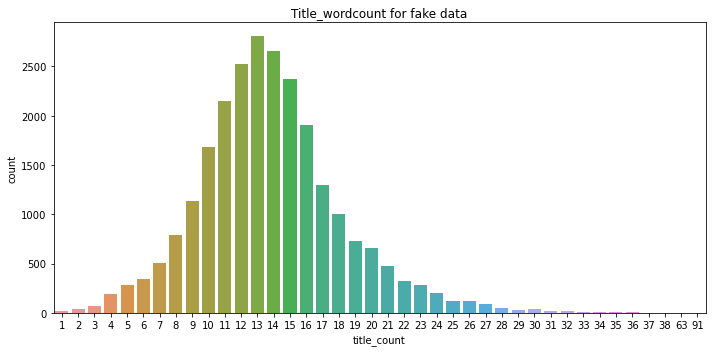

In [25]:
plt.figure(figsize=(10,5))
plt.title('Title_wordcount for fake data')
sns.countplot(data=fake,x='title_count')
plt.tight_layout()

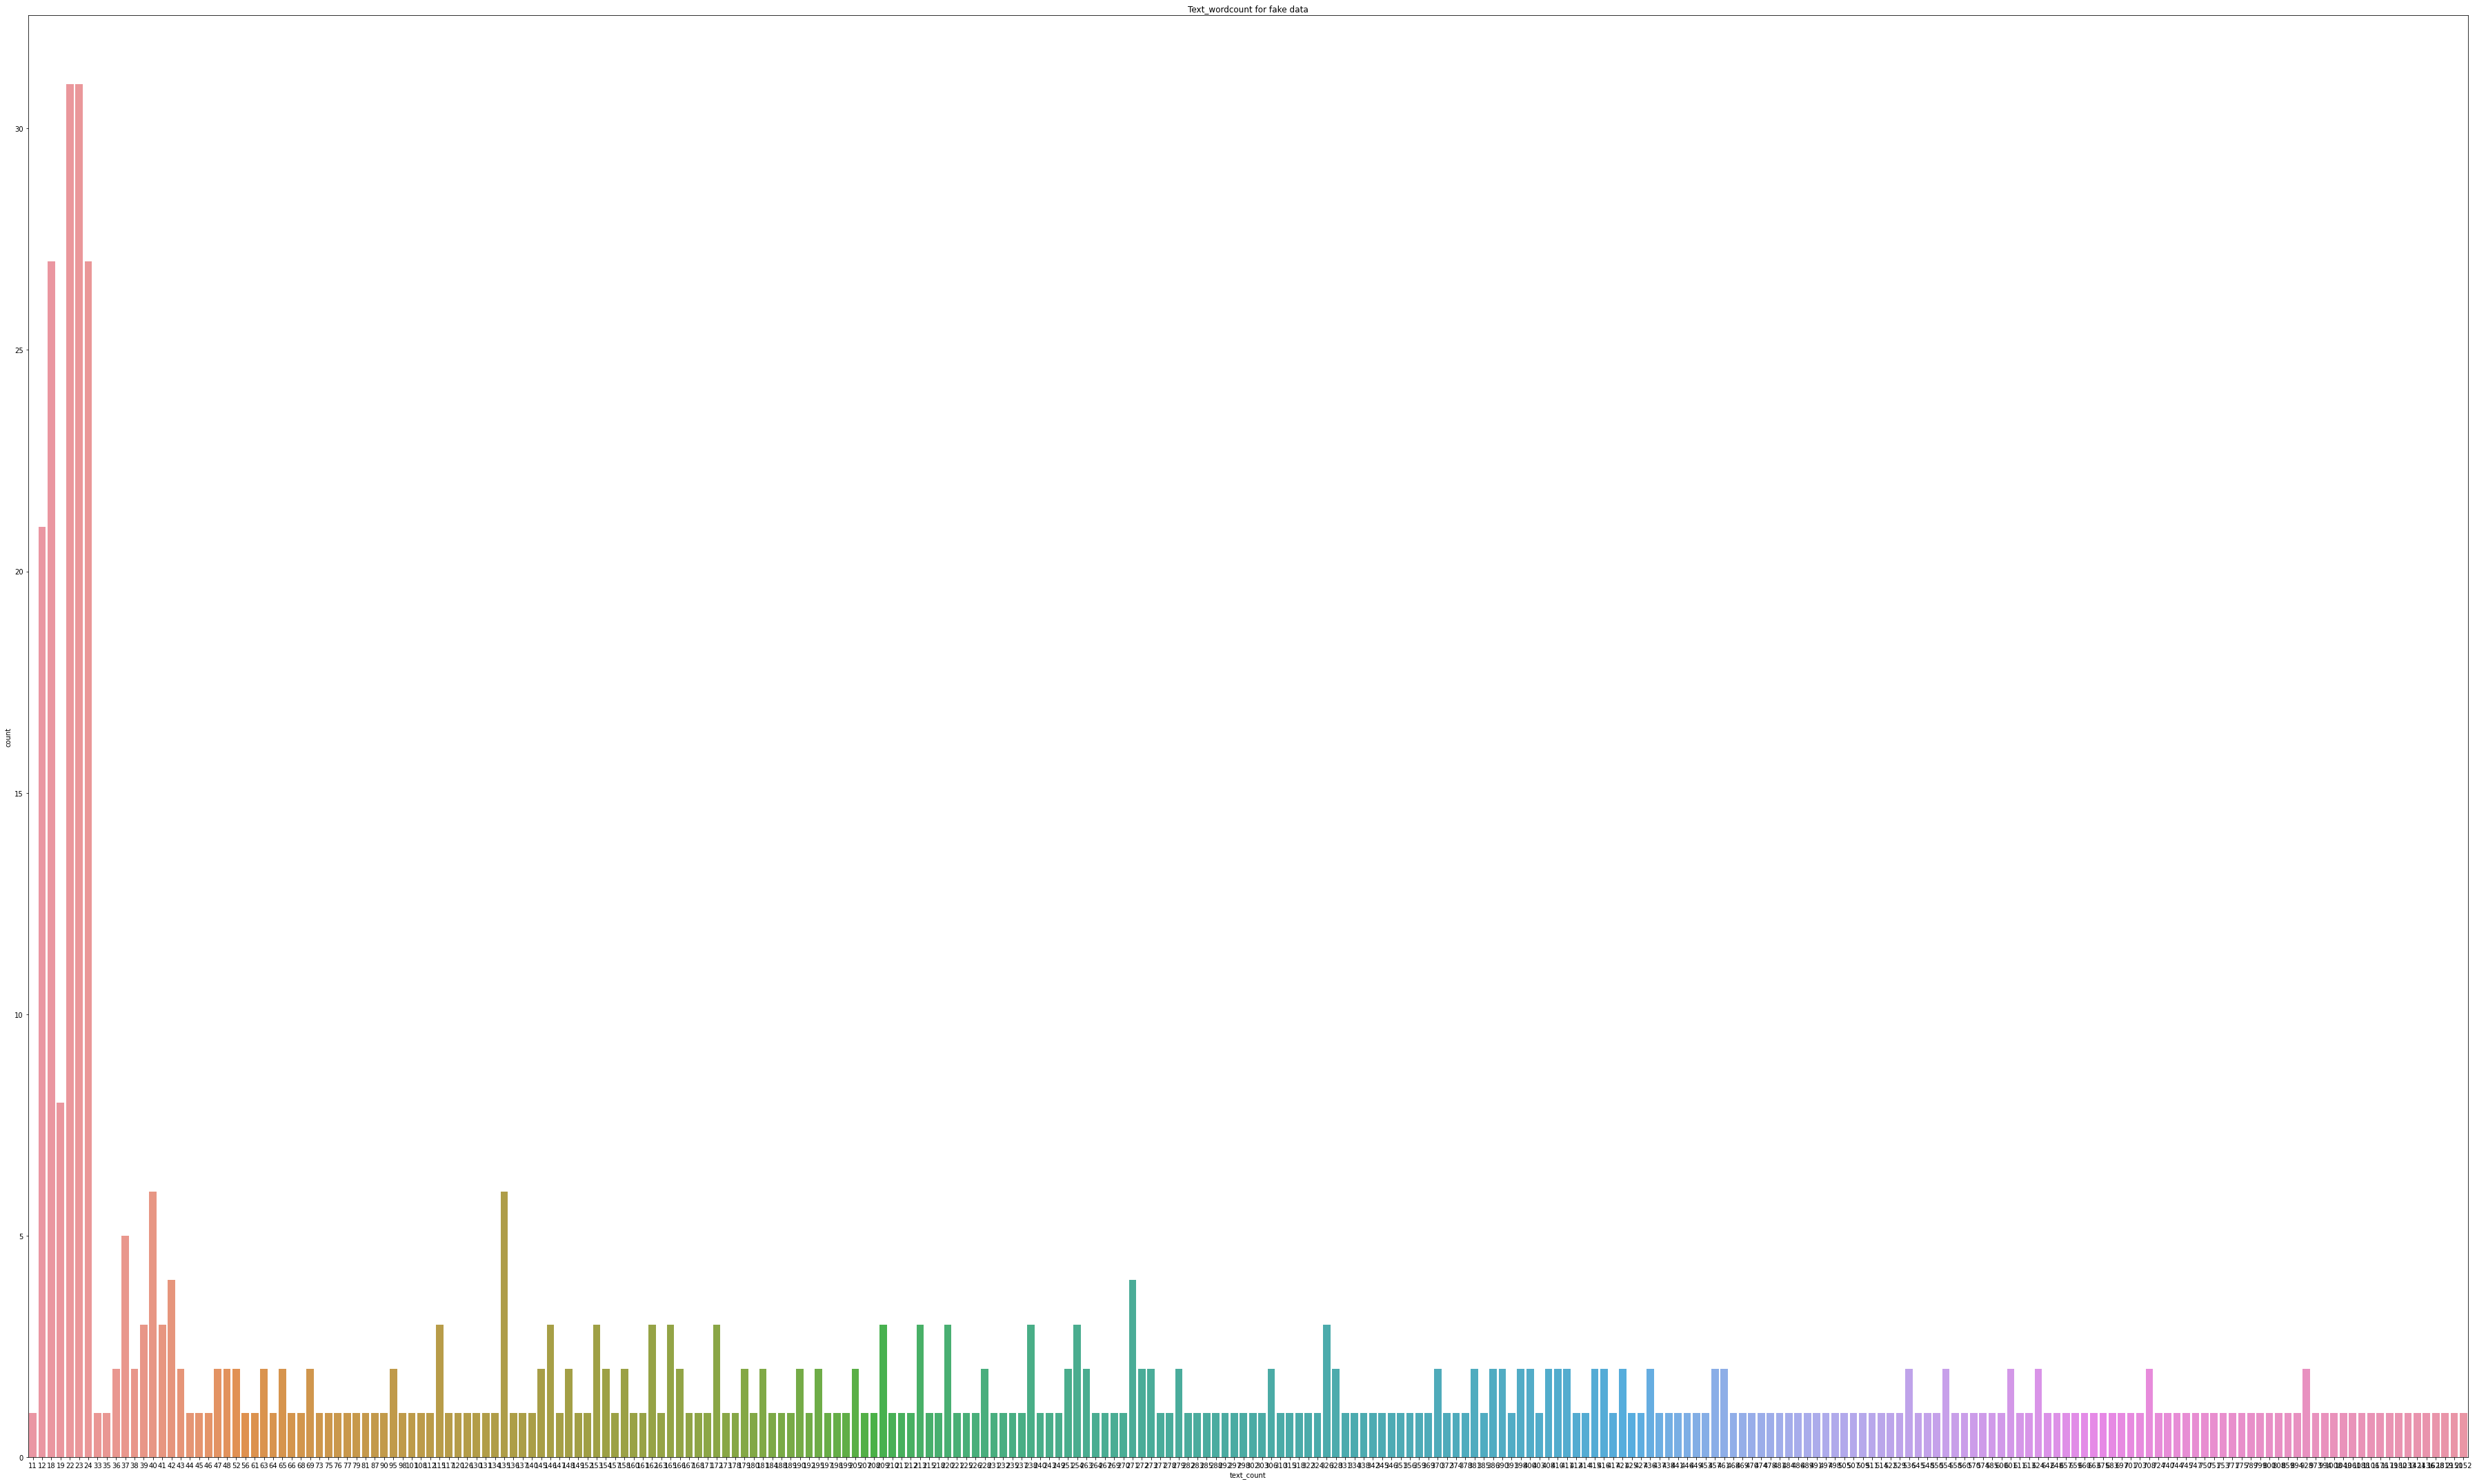

In [26]:
plt.figure(figsize=(50,30))
plt.title('Text_wordcount for fake data')
sns.countplot(data=fake[0:500],x='text_count')
plt.tight_layout()

In [27]:
fake['text_count'].value_counts()


23      175
22      173
18      159
24      141
183     130
       ... 
794       1
1170      1
682       1
1106      1
1667      1
Name: text_count, Length: 1049, dtype: int64

In [28]:
#

# Real News Data

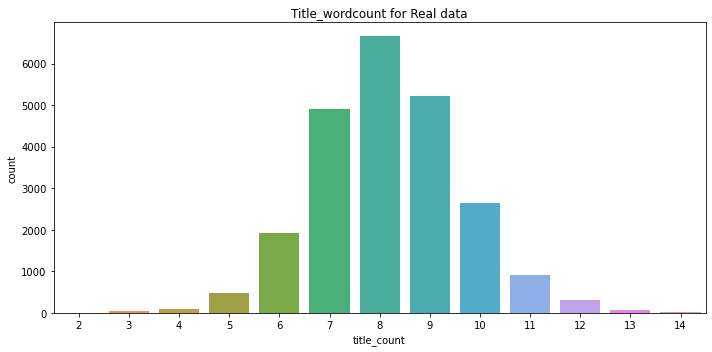

In [29]:
plt.figure(figsize=(10,5))
plt.title('Title_wordcount for Real data')
sns.countplot(data=real,x='title_count')
plt.tight_layout()

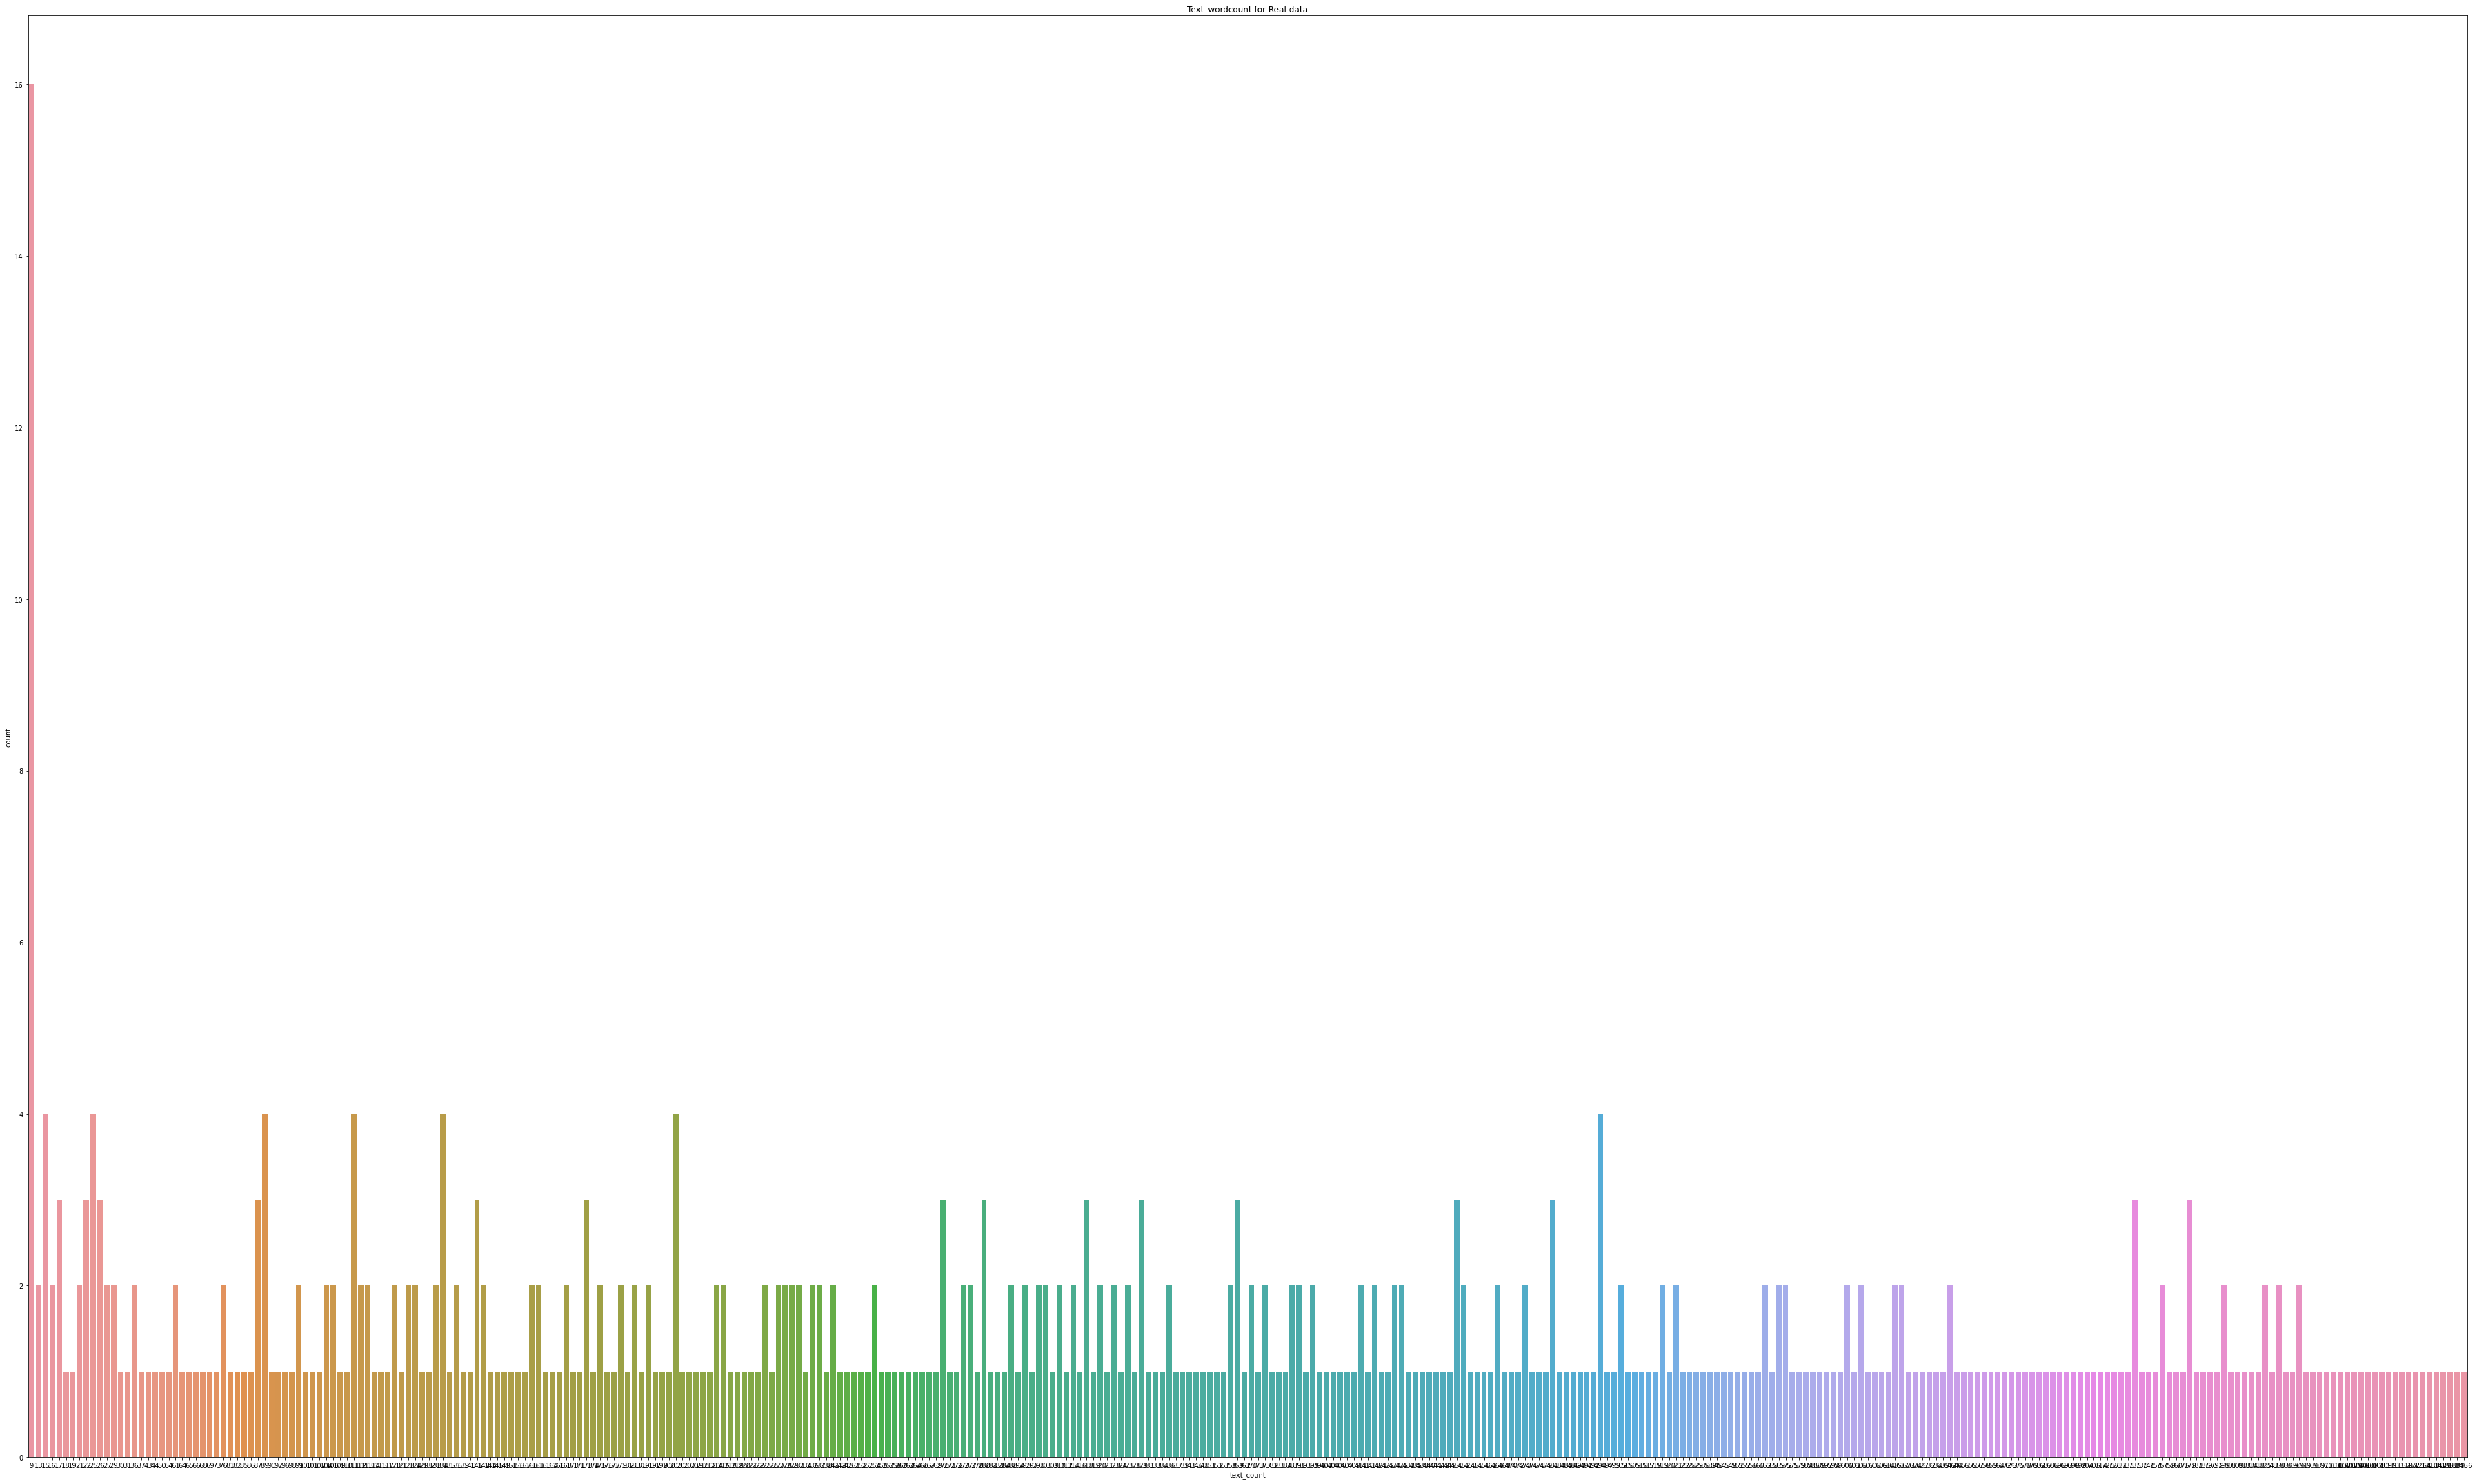

In [30]:
plt.figure(figsize=(50,30))
plt.title('Text_wordcount for Real data')
sns.countplot(data=real[0:500],x='text_count')
plt.tight_layout()

In [31]:
real['text_count'].value_counts()[0:200]

2      600
9      450
8      359
15     356
10     350
      ... 
270     16
203     16
197     16
181     16
190     16
Name: text_count, Length: 200, dtype: int64

# Class Imbalance

<AxesSubplot:xlabel='Label', ylabel='count'>

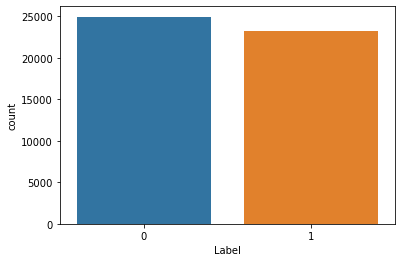

In [32]:
sns.countplot(x = df3['Label'])

# wordcloud for fake news

In [33]:
from wordcloud import WordCloud, STOPWORDS

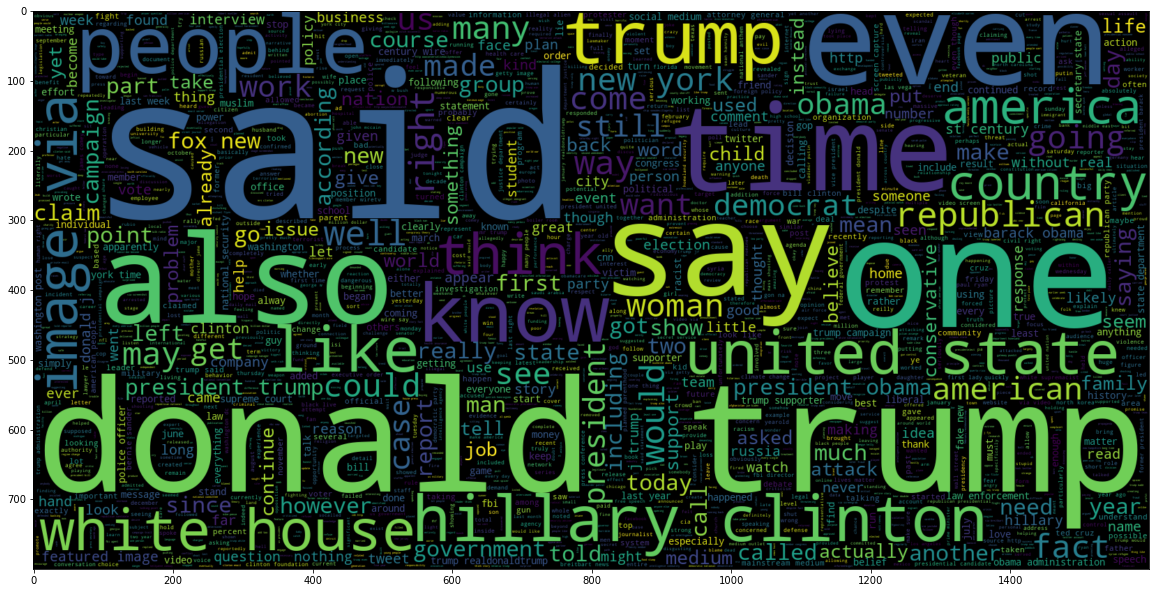

In [34]:
# plot the word cloud for text that is fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(fake.text))
plt.imshow(wc, interpolation = 'bilinear')

# word cloud for true news

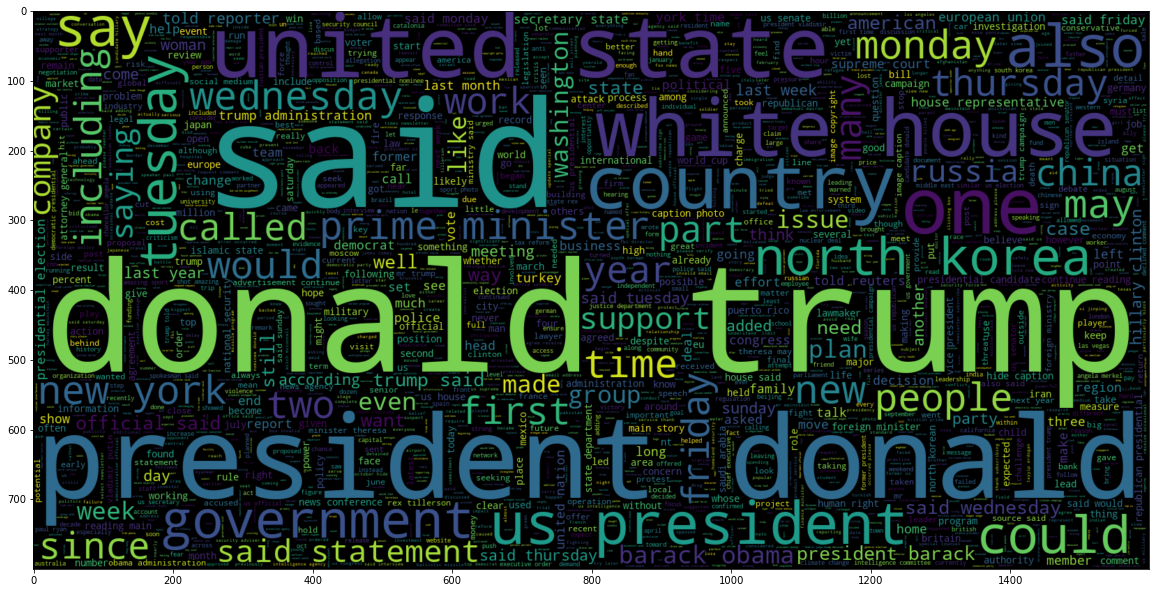

In [35]:
# plot the word cloud for text that is Real
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(real.text))
plt.imshow(wc, interpolation = 'bilinear')